In [2]:
!nvidia-smi


Tue Jan  5 06:40:03 2021       
+-----------------------------------------------------------------------------+
| NVIDIA-SMI 460.27.04    Driver Version: 418.67       CUDA Version: 10.1     |
|-------------------------------+----------------------+----------------------+
| GPU  Name        Persistence-M| Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp  Perf  Pwr:Usage/Cap|         Memory-Usage | GPU-Util  Compute M. |
|                               |                      |               MIG M. |
|===============================+======================+======================|
|   0  Tesla T4            Off  | 00000000:00:04.0 Off |                    0 |
| N/A   35C    P8     9W /  70W |      0MiB / 15079MiB |      0%      Default |
|                               |                      |                 ERR! |
+-------------------------------+----------------------+----------------------+
                                                                               
+-------

In [1]:
from google.colab import drive
drive.mount('/content/drive/')

Mounted at /content/drive/


In [6]:
import numpy as np
import os
import matplotlib.pyplot as plt
import keras
import tensorflow as tf
from tensorflow.keras.optimizers import RMSprop
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.models import load_model
from tensorflow.keras.preprocessing import image
import cv2
from glob import glob


In [3]:
path='/content/drive/My Drive/Glaucoma'
mainDIR= os.listdir(path)
print(mainDIR)

['train', 'test']


In [4]:
test_path='/content/drive/My Drive/Glaucoma/test'
train_path='/content/drive/My Drive/Glaucoma/train'


In [7]:
folders = glob('/content/drive/My Drive/Glaucoma/train/*')

In [8]:
folders

['/content/drive/My Drive/Glaucoma/train/Glaucoma',
 '/content/drive/My Drive/Glaucoma/train/Non Glaucoma']

In [9]:
# Use the Image Data Generator to import the images from the dataset
from tensorflow.keras.preprocessing.image import ImageDataGenerator

train_datagen = ImageDataGenerator(rescale = 1./255,
                                   shear_range = 0.2,
                                   zoom_range = 0.2,
                                   horizontal_flip = True)

test_datagen = ImageDataGenerator(rescale = 1./255)



In [11]:
# Make sure you provide the same target size as initialied for the image size
training_set = train_datagen.flow_from_directory('/content/drive/My Drive/Glaucoma/train',
                                                 target_size = (224, 224),
                                                 batch_size = 32,
                                                 class_mode = 'categorical')

Found 68 images belonging to 2 classes.


In [19]:
test_set= test_datagen.flow_from_directory('/content/drive/My Drive/Glaucoma/test',
                                            target_size = (224, 224),
                                            batch_size = 32,
                                            class_mode = 'categorical')

Found 12 images belonging to 2 classes.


In [12]:
training_set.class_indices

{'Glaucoma': 0, 'Non Glaucoma': 1}

In [82]:
model = tf.keras.Sequential([
    tf.keras.layers.Conv2D(16, (3, 3), activation = 'relu',padding='same',kernel_initializer='he_uniform', input_shape = (224, 224, 3)), 
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Dropout(.25),
    tf.keras.layers.Conv2D(16, (3, 3), activation = 'relu',padding='same',kernel_initializer='he_uniform'),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Dropout(.25),
    tf.keras.layers.Conv2D(32, (3, 3), activation = 'relu',padding='same',kernel_initializer='he_uniform'),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Dropout(.25),
    # tf.keras.layers.Conv2D(32, (3, 3), activation = 'relu',kernel_initializer='he_uniform'),
    # tf.keras.layers.MaxPooling2D(2,2),
    # tf.keras.layers.Dropout(.25),
    tf.keras.layers.Conv2D(64, (3, 3), activation = 'relu',kernel_initializer='he_uniform'),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Dropout(.5),
    # tf.keras.layers.Conv2D(64, (3, 3), activation = 'relu',kernel_initializer='he_uniform'),
    # tf.keras.layers.MaxPooling2D(2,2),
    # tf.keras.layers.Dropout(.5),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(500, activation='relu'),
    tf.keras.layers.Dense(len(training_set.class_indices),activation='softmax')
])
model.summary()

Model: "sequential_7"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_39 (Conv2D)           (None, 224, 224, 16)      448       
_________________________________________________________________
max_pooling2d_38 (MaxPooling (None, 112, 112, 16)      0         
_________________________________________________________________
dropout_35 (Dropout)         (None, 112, 112, 16)      0         
_________________________________________________________________
conv2d_40 (Conv2D)           (None, 112, 112, 16)      2320      
_________________________________________________________________
max_pooling2d_39 (MaxPooling (None, 56, 56, 16)        0         
_________________________________________________________________
dropout_36 (Dropout)         (None, 56, 56, 16)        0         
_________________________________________________________________
conv2d_41 (Conv2D)           (None, 56, 56, 32)       

In [83]:
model.compile(loss='categorical_crossentropy',optimizer='Adam',metrics=['accuracy']  ) 

In [84]:
r = model.fit_generator(
  training_set,
  validation_data=test_set,
  epochs=50,
  steps_per_epoch=len(training_set),
  validation_steps=len(test_set)
  
)

/usr/local/lib/python3.6/dist-packages/tensorflow/python/keras/engine/training.py:1844: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  warnings.warn('`Model.fit_generator` is deprecated and '


Epoch 1/50
3/3 [==============================] - 3s 747ms/step - loss: 50.5802 - accuracy: 0.5139 - val_loss: 25.5594 - val_accuracy: 0.5000
Epoch 2/50
3/3 [==============================] - 2s 562ms/step - loss: 87.4497 - accuracy: 0.5039 - val_loss: 1.5509 - val_accuracy: 0.5000
Epoch 3/50
3/3 [==============================] - 2s 904ms/step - loss: 8.7954 - accuracy: 0.5278 - val_loss: 1.9344 - val_accuracy: 0.5000
Epoch 4/50
3/3 [==============================] - 2s 549ms/step - loss: 9.5078 - accuracy: 0.4883 - val_loss: 1.0926 - val_accuracy: 0.5000
Epoch 5/50
3/3 [==============================] - 2s 538ms/step - loss: 5.4425 - accuracy: 0.4922 - val_loss: 0.7524 - val_accuracy: 0.5000
Epoch 6/50
3/3 [==============================] - 2s 532ms/step - loss: 2.4096 - accuracy: 0.5226 - val_loss: 0.6783 - val_accuracy: 0.5000
Epoch 7/50
3/3 [==============================] - 2s 542ms/step - loss: 1.0394 - accuracy: 0.5148 - val_loss: 0.6718 - val_accuracy: 0.9167
Epoch 8/50
3/3 [=

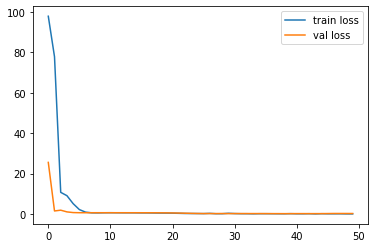

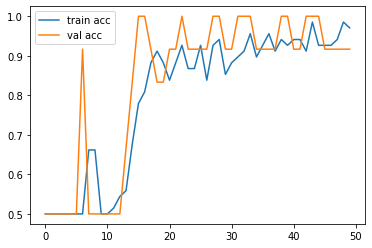

<Figure size 432x288 with 0 Axes>

In [85]:
# plot the loss
plt.plot(r.history['loss'], label='train loss')
plt.plot(r.history['val_loss'], label='val loss')
plt.legend()
plt.show()
plt.savefig('LossVal_loss')

# plot the accuracy
plt.plot(r.history['accuracy'], label='train acc')
plt.plot(r.history['val_accuracy'], label='val acc')
plt.legend()
plt.show()
plt.savefig('AccVal_acc')

In [92]:
from tensorflow.keras.models import load_model

model.save('model_final1.h5')

In [87]:

y_pred = model.predict(test_set)

In [88]:
y_pred

array([[0.6739608 , 0.32603922],
       [0.18788667, 0.81211334],
       [0.8869946 , 0.11300535],
       [0.30177197, 0.69822806],
       [0.8288084 , 0.17119156],
       [0.4223637 , 0.5776363 ],
       [0.11515101, 0.88484895],
       [0.6922356 , 0.30776438],
       [0.20087178, 0.79912823],
       [0.82470816, 0.17529184],
       [0.15561192, 0.84438807],
       [0.21860725, 0.7813928 ]], dtype=float32)

In [89]:

import numpy as np
y_pred = np.argmax(y_pred, axis=1)

In [90]:
y_pred

array([0, 1, 0, 1, 0, 1, 1, 0, 1, 0, 1, 1])

In [93]:
model=load_model('model_final1.h5')

In [94]:
img=image.load_img('/content/drive/MyDrive/Glaucoma/test/Non Glaucoma/1 (35).tif',target_size=(224,224))

In [95]:
x=image.img_to_array(img)
x

array([[[ 0.,  0.,  0.],
        [ 0.,  0.,  0.],
        [ 0.,  0.,  0.],
        ...,
        [ 0.,  0.,  0.],
        [ 0.,  0.,  0.],
        [ 0.,  0.,  0.]],

       [[ 1.,  1.,  1.],
        [ 1.,  1.,  1.],
        [ 1.,  1.,  1.],
        ...,
        [ 1.,  1.,  1.],
        [ 1.,  1.,  1.],
        [ 1.,  1.,  1.]],

       [[ 1.,  1.,  1.],
        [ 0.,  0.,  0.],
        [ 0.,  0.,  0.],
        ...,
        [ 0.,  0.,  0.],
        [ 1.,  1.,  1.],
        [ 1.,  1.,  1.]],

       ...,

       [[ 8.,  8.,  8.],
        [ 7.,  7.,  7.],
        [ 6.,  6.,  6.],
        ...,
        [ 7.,  7.,  7.],
        [ 6.,  6.,  6.],
        [ 8.,  8.,  8.]],

       [[ 7.,  7.,  7.],
        [ 8.,  8.,  8.],
        [ 7.,  7.,  7.],
        ...,
        [ 6.,  6.,  8.],
        [ 6.,  6.,  8.],
        [ 6.,  6.,  8.]],

       [[10.,  8.,  9.],
        [ 9.,  7.,  8.],
        [ 8.,  6.,  7.],
        ...,
        [ 7.,  7.,  7.],
        [ 7.,  7.,  9.],
        [ 6.,  6.,  8.]]

In [96]:
x.shape

(224, 224, 3)

In [97]:

x=x/255

In [98]:
from keras.applications.resnet50 import preprocess_input
x=np.expand_dims(x,axis=0)

img_data=preprocess_input(x)
img_data.shape

(1, 224, 224, 3)

In [99]:

model.predict(img_data)

array([[1., 0.]], dtype=float32)

In [100]:

a=np.argmax(model.predict(img_data), axis=1)

In [101]:
if(a==1):
    print("Non-Glaucoma")
else:
    print("Glaucoma")


Glaucoma
